<a href="https://colab.research.google.com/github/DavidCastroPena/credit-models/blob/model_1_XGBBoostSurvival/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.utils import resample
# Paths to your files
import pandas as pd

# First attempt with folder ID
path1_10_present = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/10_present.csv'
path1_91_09 = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/91_09.csv'

# Second attempt with folder name
path2_10_present = '/content/drive/My Drive/MS&E246/10_present.csv'
path2_91_09 = '/content/drive/My Drive/MS&E246/91_09.csv'

# Try reading with both paths
try:
    # Try first path
    df_10_present = pd.read_csv(path1_10_present)
    df_91_09 = pd.read_csv(path1_91_09)
    print("Successfully read from folder ID path")
except:
    try:
        # Try second path
        df_10_present = pd.read_csv(path2_10_present)
        df_91_09 = pd.read_csv(path2_91_09)
        print("Successfully read from folder name path")
    except Exception as e:
        print(f"Error: {e}")

<ipython-input-3-4238d0bcc21f>:22: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_10_present = pd.read_csv(path2_10_present)
<ipython-input-3-4238d0bcc21f>:23: DtypeWarning: Columns (12,13,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_91_09 = pd.read_csv(path2_91_09)


Successfully read from folder name path


In [ ]:
import pandas as pd

# File paths
path1_10_present = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/10_present.csv'
path1_91_09 = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/91_09.csv'

path2_10_present = '/content/drive/My Drive/MS&E246/10_present.csv'
path2_91_09 = '/content/drive/My Drive/MS&E246/91_09.csv'

# Attempt to read the datasets from the first paths, then fallback to second paths if needed
try:
    df_10_present = pd.read_csv(path1_10_present)
    df_91_09 = pd.read_csv(path1_91_09)
    print("Successfully read from folder ID path")
except:
    try:
        df_10_present = pd.read_csv(path2_10_present)
        df_91_09 = pd.read_csv(path2_91_09)
        print("Successfully read from folder name path")
    except Exception as e:
        print(f"Error: {e}")

# Align columns (ensure both datasets have the same column order and names)
# Find common columns
common_columns = list(set(df_10_present.columns).intersection(set(df_91_09.columns)))
df_10_present = df_10_present[common_columns]
df_91_09 = df_91_09[common_columns]

# Concatenate the datasets (91_09 above, 10_present below)
df_combined = pd.concat([df_91_09, df_10_present], ignore_index=True)

# Output the shape and preview of the combined dataframe
print(f"Combined dataset shape: {df_combined.shape}")
print(df_combined.head())

# Save the combined dataset to a new file if needed
output_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df_combined.to_csv(output_path, index=False)
print(f"Combined dataset saved to: {output_path}")


<ipython-input-4-b84f50aac373>:17: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_10_present = pd.read_csv(path2_10_present)
<ipython-input-4-b84f50aac373>:18: DtypeWarning: Columns (12,13,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_91_09 = pd.read_csv(path2_91_09)


Successfully read from folder name path
Combined dataset shape: (218095, 38)
   Program  TermInMonths  ApprovalFiscalYear   AsOfDate BorrState  \
0      504           240                1991  9/30/2024        CA   
1      504           240                1991  9/30/2024        UT   
2      504           240                1991  9/30/2024        WY   
3      504           120                1991  9/30/2024        IN   
4      504           240                1991  9/30/2024        IN   

  ThirdPartyLender_Name BusinessAge  BorrZip CDC_State  \
0                   NaN         NaN    92121        CA   
1                   NaN         NaN    84115        UT   
2                   NaN         NaN    83001        UT   
3                   NaN         NaN    47620        IN   
4                   NaN         NaN    46514        IN   

                         CDC_Name  ... FranchiseCode ThirdPartyLender_City  \
0  CDC Small Business Finance Cor  ...           NaN                   NaN   
1  

Concatenating two files

In [ ]:
df_combined = pd.concat([df_91_09, df_10_present], ignore_index=True)
print(f"Combined dataset shape: {df_combined.shape}")
print(df_combined.head())

# Save the combined dataset to a new file if needed
output_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df_combined.to_csv(output_path, index=False)
print(f"Combined dataset saved to: {output_path}")

Combined dataset shape: (218095, 38)
   Program  TermInMonths  ApprovalFiscalYear   AsOfDate BorrState  \
0      504           240                1991  9/30/2024        CA   
1      504           240                1991  9/30/2024        UT   
2      504           240                1991  9/30/2024        WY   
3      504           120                1991  9/30/2024        IN   
4      504           240                1991  9/30/2024        IN   

  ThirdPartyLender_Name BusinessAge  BorrZip CDC_State  \
0                   NaN         NaN    92121        CA   
1                   NaN         NaN    84115        UT   
2                   NaN         NaN    83001        UT   
3                   NaN         NaN    47620        IN   
4                   NaN         NaN    46514        IN   

                         CDC_Name  ... FranchiseCode ThirdPartyLender_City  \
0  CDC Small Business Finance Cor  ...           NaN                   NaN   
1  Mountain West Small Business F  ...     

30,641 CANCLD loans. Q1: IF loanstatus=chgoff & grosschargeoff different from 0; should be removed? Q2: missing values was created based on whether loanstatus is empty. is this right?

In [ ]:

# Load the combined dataset
combined_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df = pd.read_csv(combined_path)

# Step 1: Create a copy of the dataset
df_cleaned = df.copy()
print(f"Initial dataset shape: {df_cleaned.shape}")

# Step 2: Remove loans labeled "Canceled"
if 'LoanStatus' in df_cleaned.columns:
    df_cleaned = df_cleaned[df_cleaned['LoanStatus'] != 'CANCLD']
    print(f"After removing 'Canceled' loans: {df_cleaned.shape}")
else:
    print("'LoanStatus' column not found. Skipping 'Canceled' filtering.")

# Step 3: Handle blank or missing LoanStatus
# Create a binary variable `missingStatus`
if 'LoanStatus' in df_cleaned.columns:
    df_cleaned['missingStatus'] = df_cleaned['LoanStatus'].isnull() | (df_cleaned['LoanStatus'].str.strip() == "")
    df_cleaned['missingStatus'] = df_cleaned['missingStatus'].astype(int)
    print(f"After creating 'missingStatus': {df_cleaned.shape}")
    print(f"Number of rows with missing statuses: {df_cleaned['missingStatus'].sum()}")
else:
    print("'LoanStatus' column not found. Skipping 'missingStatus' creation.")

# Step 4: Save the updated dataset
updated_path = '/content/drive/My Drive/MS&E246/cleaned_with_missing_status.csv'
df_cleaned.to_csv(updated_path, index=False)
print(f"Updated dataset saved to: {updated_path}")



<ipython-input-6-6a3024ae9c8b>:3: DtypeWarning: Columns (5,6,19,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(combined_path)


Initial dataset shape: (218095, 38)
After removing 'Canceled' loans: (187454, 38)
After creating 'missingStatus': (187454, 39)
Number of rows with missing statuses: 350
Updated dataset saved to: /content/drive/My Drive/MS&E246/cleaned_with_missing_status.csv


In [ ]:
#Model Splitting should be done by calendar dates
'''
Proposed Splitting Strategy
To create training, validation, and testing sets that align with these economic shifts, split the data based on these crises:

Training Set (Pre-Crisis Stability and Dot-Com Era):
Timeframe: 1990–2006.
Rationale: This period includes relatively stable economic years, the Dot-Com bubble, and its aftermath. Training the model on this data helps it learn patterns from normal and mildly volatile periods.

Validation Set (2007–2015, Financial Crisis and Recovery):
Timeframe: 2007–2015.
Rationale: Includes the 2007–2008 financial crisis, the subsequent Great Recession, and the recovery phase. This period helps validate how well the model generalizes to high-stress financial environments.

Testing Set (COVID-19 Pandemic and Current Data):
Timeframe: 2016–2024.
Rationale: Includes recent years leading up to and during the COVID-19 pandemic, as well as the post-pandemic recovery. This evaluates the model's robustness on recent economic disruptions.
'''



"\nProposed Splitting Strategy\nTo create training, validation, and testing sets that align with these economic shifts, split the data based on these crises:\n\nTraining Set (Pre-Crisis Stability and Dot-Com Era):\n\nTimeframe: 1990–2006.\nRationale: This period includes relatively stable economic years, the Dot-Com bubble, and its aftermath. Training the model on this data helps it learn patterns from normal and mildly volatile periods.\nValidation Set (2007–2015, Financial Crisis and Recovery):\n\nTimeframe: 2007–2015.\nRationale: Includes the 2007–2008 financial crisis, the subsequent Great Recession, and the recovery phase. This period helps validate how well the model generalizes to high-stress financial environments.\nTesting Set (COVID-19 Pandemic and Current Data):\n\nTimeframe: 2016–2024.\nRationale: Includes recent years leading up to and during the COVID-19 pandemic, as well as the post-pandemic recovery. This evaluates the model's robustness on recent economic disruptions.\

In [ ]:
# Feature selection: two strategies--using Kai's Chi2 test and via logistic regression using literature suggested variables

'''
PIF: Paid In Full.
CANCLD: Canceled.
CHGOFF: Charged Off (Default).
nan: Missing/Not Available.
EXEMPT: Exempt (special status, possibly regulatory or administrative).
If you are focusing on predicting defaults, you would typically:

Treat CHGOFF as a default (1).
Treat PIF and potentially EXEMPT as non-defaults (0).
Exclude or handle CANCLD and missing values (nan) separately, depending on their role in your analysis.
'''

# Add the binary "Default" variable
# 1 for "CHGOFF" (default), 0 for "PIF" or "EXEMPT"
df_cleaned['Default'] = df_cleaned['LoanStatus'].apply(lambda x: 1 if x == 'CHGOFF' else 0)

# Check the distribution of the new "Default" variable
default_distribution = df_cleaned['Default'].value_counts()
print(f"Default distribution:\n{default_distribution}")

# Save the updated dataset
updated_path = '/content/drive/My Drive/MS&E246/cleaned_with_defaults.csv'
df_cleaned.to_csv(updated_path, index=False)
print(f"Updated dataset with 'Default' variable saved to: {updated_path}")




Default distribution:
Default
0    175376
1     12078
Name: count, dtype: int64
Updated dataset with 'Default' variable saved to: /content/drive/My Drive/MS&E246/cleaned_with_defaults.csv


In [ ]:
#Feature analysis: logit(P (Default=1))= b0+b1GrossAproval+B2*TermInMonths+B3*NaicsCode=B4ApprovalFiscalYear+B5JobsSupported+B6NaicsDescription

#B6 is high dimensional. so lets prompt gemini to reduce the dimensionality of B6

# Load the dataset
data_path = '/content/drive/My Drive/MS&E246/cleaned_with_defaults.csv'
df = pd.read_csv(data_path, low_memory=False)

# NAICS code mappings to Sectors
naics_mapping = {
    '11': 'Agriculture',       # Agriculture, Forestry, Fishing, and Hunting
    '21': 'Mining',            # Mining, Quarrying, and Oil and Gas Extraction
    '22': 'Utilities',         # Utilities
    '23': 'Construction',      # Construction
    '31': 'Manufacturing',     # Manufacturing
    '32': 'Manufacturing',     # Manufacturing
    '33': 'Manufacturing',     # Manufacturing
    '42': 'Wholesale Trade',   # Wholesale Trade
    '44': 'Retail Trade',      # Retail Trade
    '45': 'Retail Trade',      # Retail Trade
    '48': 'Transportation',    # Transportation and Warehousing
    '49': 'Transportation',    # Transportation and Warehousing
    '51': 'Information',       # Information
    '52': 'Finance',           # Finance and Insurance
    '53': 'Real Estate',       # Real Estate and Rental and Leasing
    '54': 'Services',          # Professional, Scientific, and Technical Services
    '55': 'Management',        # Management of Companies and Enterprises
    '56': 'Administrative',    # Administrative and Support and Waste Management
    '61': 'Services',          # Educational Services
    '62': 'Services',          # Health Care and Social Assistance
    '71': 'Entertainment',     # Arts, Entertainment, and Recreation
    '72': 'Hospitality',       # Accommodation and Food Services
    '81': 'Other',             # Other Services (except Public Administration)
    '92': 'Public',            # Public Administration
}

# Helper function to map NAICS codes to Sectors
def map_naics_code(code):
    try:
        if pd.notnull(code) and float(code) != 0.0:  # Exclude invalid codes
            code = str(int(float(code)))  # Convert to string
            naics_prefix = code[:2]  # Get the first 2 digits
            return naics_mapping.get(naics_prefix, "Other")  # Map to category
        return "Other"  # Default for missing or invalid codes
    except ValueError:
        return "Other"  # Handle unexpected non-numeric values

# Map NaicsCode to Sectors
df['Sector'] = df['NaicsCode'].apply(map_naics_code)

# Display unique values in the Sector column
if 'Sector' in df.columns:
    unique_sectors = df['Sector'].unique()
    print("Unique values in 'Sector' column:")
    print(unique_sectors)
    print(f"Total unique values: {len(unique_sectors)}")
else:
    print("The 'Sector' column is not present in the dataset.")

# One-hot encode the Sector column
df_encoded = pd.get_dummies(df, columns=['Sector'], prefix='Sector', drop_first=False)

# Correct the one-hot encoded columns by replacing True/False with 1/0
sector_columns = [col for col in df_encoded.columns if col.startswith('Sector_')]
df_encoded[sector_columns] = df_encoded[sector_columns].replace({False: 0, True: 1})

# Save the updated dataset with corrected sector columns
output_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df_encoded.to_csv(output_path, index=False)

# Print confirmation and dataset details
print(f"\nUpdated dataset with corrected sector columns saved to: {output_path}")
print(f"Shape of the dataset after encoding: {df_encoded.shape}")
print("\nColumns in the dataset after encoding:")
print(df_encoded.columns.tolist())

# Verify the encoding
print("\nSector column verification:")
for col in sector_columns:
    print(f"{col}: Unique values -> {df_encoded[col].unique()}")


Unique values in 'Sector' column:
['Other' 'Retail Trade' 'Wholesale Trade' 'Manufacturing' 'Administrative'
 'Agriculture' 'Construction' 'Services' 'Transportation' 'Information'
 'Mining' 'Entertainment' 'Real Estate' 'Hospitality' 'Public' 'Utilities'
 'Management' 'Finance']
Total unique values: 18


<ipython-input-9-06a588991ff5>:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[sector_columns] = df_encoded[sector_columns].replace({False: 0, True: 1})



Updated dataset with corrected sector columns saved to: /content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv
Shape of the dataset after encoding: (187454, 58)

Columns in the dataset after encoding:
['Program', 'TermInMonths', 'ApprovalFiscalYear', 'AsOfDate', 'BorrState', 'ThirdPartyLender_Name', 'BusinessAge', 'BorrZip', 'CDC_State', 'CDC_Name', 'BorrName', 'SBADistrictOffice', 'CDC_City', 'FranchiseName', 'ProjectState', 'JobsSupported', 'ApprovalDate', 'CDC_Zip', 'ChargeOffDate', 'ThirdPartyLender_State', 'FirstDisbursementDate', 'LoanStatus', 'NaicsDescription', 'PaidInFullDate', 'ThirdPartyDollars', 'NaicsCode', 'BorrStreet', 'Subprogram', 'FranchiseCode', 'ThirdPartyLender_City', 'GrossChargeOffAmount', 'CDC_Street', 'GrossApproval', 'BorrCity', 'BusinessType', 'DeliveryMethod', 'CongressionalDistrict', 'ProjectCounty', 'missingStatus', 'Default', 'Sector_Administrative', 'Sector_Agriculture', 'Sector_Construction', 'Sector_Entertainment', 'Sector_Finance',

In [ ]:
#Logistic regression

# Separate majority and minority classes
df_majority = df[df['Default'] == 0]
df_minority = df[df['Default'] == 1]

# Undersample the majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,     # Sample without replacement
                                    n_samples=len(df_minority),  # Match minority class size
                                    random_state=42)   # Reproducibility

# Combine undersampled majority class with the minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Shared independent variables
shared_vars = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']

# Dynamically find all `Sector_*` columns
sector_columns = [col for col in df_balanced.columns if col.startswith('Sector_')]

# Split the sector columns into six groups
sector_groups = [sector_columns[i::6] for i in range(6)]

# Fit logistic regression models for each group
results = []
for i, group in enumerate(sector_groups):
    print(f"\n--- Model {i + 1}: Including sectors {group} ---")

    # Define dependent and independent variables
    independent_vars = shared_vars + group
    df_subset = df_balanced[[dependent_var] + independent_vars].dropna()

    X = df_subset[independent_vars]
    y = df_subset[dependent_var]

    # Add constant
    X = sm.add_constant(X)

    # Fit logistic regression
    try:
        model = sm.Logit(y, X)
        result = model.fit()
        results.append(result)

        # Print summary for the current model
        print(result.summary())
    except Exception as e:
        print(f"Error fitting Model {i + 1}: {e}")




--- Model 1: Including sectors ['Sector_Administrative', 'Sector_Information', 'Sector_Real Estate'] ---
Optimization terminated successfully.
         Current function value: 0.628623
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                24156
Model:                          Logit   Df Residuals:                    24148
Method:                           MLE   Df Model:                            7
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                 0.09309
Time:                        03:57:09   Log-Likelihood:                -15185.
converged:                       True   LL-Null:                       -16744.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
#Feature selection
'''
Key Recommendations for Features
Based on the results:

Retain Common Predictors Across All Models:

GrossApproval, TermInMonths, ApprovalFiscalYear, and JobsSupported are consistent, significant predictors.
They should be included in any model predicting defaults.

Include Significant Sector-Specific Variables:

Based on sector p-values, include:
Sector_Real Estate (from Model 1)
Sector_Retail Trade (from Model 2)
Sector_Manufacturing and Sector_Services (from Model 3)
Sector_Entertainment and Sector_Transportation (from Model 4)
Sector_Finance and Sector_Other (from Model 5)
'''




In [ ]:
#XGB Boost with survival: baseline


!pip install lifelines  # Install lifelines for survival analysis

import pandas as pd
import numpy as np
import xgboost as xgb
from lifelines.utils import concordance_index  # Correct import
from datetime import datetime


# Make sure the cleaned_with_defaults gets loaded
data_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(data_path, low_memory=False)

# Convert date columns to datetime
date_cols = ['ApprovalDate', 'ChargeOffDate', 'PaidInFullDate', 'AsOfDate']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Define Survival Time and Censoring
def calculate_survival_time(row):
    if not pd.isna(row['ChargeOffDate']):  # Default occurred
        return (row['ChargeOffDate'] - row['ApprovalDate']).days
    elif not pd.isna(row['PaidInFullDate']):  # Paid in full
        return (row['PaidInFullDate'] - row['ApprovalDate']).days
    else:  # Censored
        return (row['AsOfDate'] - row['ApprovalDate']).days

# Apply the survival time calculation
df['SurvivalTime'] = df.apply(calculate_survival_time, axis=1)

# Define the censoring indicator
df['Event'] = np.where(df['LoanStatus'] == 'CHGOFF', 1, 0)

# Filter relevant columns and drop rows with missing data
relevant_columns = ['SurvivalTime', 'Event', 'GrossApproval', 'TermInMonths',
                   'ApprovalFiscalYear', 'JobsSupported']
df = df[relevant_columns].dropna()

# Split data based on proposed timeframes
train_df = df[df['ApprovalFiscalYear'] <= 2006]  # Training: 1990–2006
val_df = df[(df['ApprovalFiscalYear'] >= 2007) & (df['ApprovalFiscalYear'] <= 2015)]  # Validation: 2007–2015
test_df = df[df['ApprovalFiscalYear'] >= 2016]  # Testing: 2016–2024

# Separate features (X) and target variables (y)
X_train = train_df.drop(['SurvivalTime', 'Event'], axis=1)
y_train = train_df[['SurvivalTime', 'Event']]

X_val = val_df.drop(['SurvivalTime', 'Event'], axis=1)
y_val = val_df[['SurvivalTime', 'Event']]

X_test = test_df.drop(['SurvivalTime', 'Event'], axis=1)
y_test = test_df[['SurvivalTime', 'Event']]

# Prepare the data for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train['SurvivalTime'])
dval = xgb.DMatrix(X_val, label=y_val['SurvivalTime'])
dtest = xgb.DMatrix(X_test, label=y_test['SurvivalTime'])

# Define XGBoost parameters for survival
params = {
    'objective': 'survival:cox',  # Cox proportional hazards objective
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'validation')],
                  early_stopping_rounds=10, verbose_eval=True)

# Predict survival scores for the test set
y_pred = model.predict(dtest)

# Evaluate the model using Concordance Index (C-Index)
c_index = concordance_index(y_test['SurvivalTime'], -y_pred, y_test['Event'])
print(f"Concordance Index (C-Index): {c_index:.4f}")

# Save the model
model.save_model('/content/drive/My Drive/MS&E246/survival_xgboost_model.json')



[0]	validation-cox-nloglik:10.21284
[1]	validation-cox-nloglik:10.21197
[2]	validation-cox-nloglik:10.21124
[3]	validation-cox-nloglik:10.21004
[4]	validation-cox-nloglik:10.21030
[5]	validation-cox-nloglik:10.20995
[6]	validation-cox-nloglik:10.20988
[7]	validation-cox-nloglik:10.21046
[8]	validation-cox-nloglik:10.21010
[9]	validation-cox-nloglik:10.21022
[10]	validation-cox-nloglik:10.21040
[11]	validation-cox-nloglik:10.21077
[12]	validation-cox-nloglik:10.21168
[13]	validation-cox-nloglik:10.21177
[14]	validation-cox-nloglik:10.21186
[15]	validation-cox-nloglik:10.21222
Concordance Index (C-Index): 0.4330


In [ ]:
#XGB Boost with survival: including all features from logistic model

# Load the dataset
data_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(data_path, low_memory=False)

# Convert date columns to datetime
date_cols = ['ApprovalDate', 'ChargeOffDate', 'PaidInFullDate', 'AsOfDate']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate Survival Time
def calculate_survival_time(row):
    if not pd.isna(row['ChargeOffDate']):  # Default occurred
        return (row['ChargeOffDate'] - row['ApprovalDate']).days
    elif not pd.isna(row['PaidInFullDate']):  # Paid in full
        return (row['PaidInFullDate'] - row['ApprovalDate']).days
    else:  # Censored
        return (row['AsOfDate'] - row['ApprovalDate']).days

df['SurvivalTime'] = df.apply(calculate_survival_time, axis=1)

# Define the censoring indicator
df['Event'] = np.where(df['LoanStatus'] == 'CHGOFF', 1, 0)

# Select the relevant features
selected_features = [
    'SurvivalTime', 'Event', 'GrossApproval', 'TermInMonths',
    'ApprovalFiscalYear', 'JobsSupported', 'Sector_Real Estate',
    'Sector_Retail Trade', 'Sector_Manufacturing', 'Sector_Services',
    'Sector_Entertainment', 'Sector_Transportation',
    'Sector_Finance', 'Sector_Other'
]
df = df[selected_features].dropna()

# Split data based on proposed timeframes
train_df = df[df['ApprovalFiscalYear'] <= 2006]  # Training: 1990–2006
val_df = df[(df['ApprovalFiscalYear'] >= 2007) & (df['ApprovalFiscalYear'] <= 2015)]  # Validation: 2007–2015
test_df = df[df['ApprovalFiscalYear'] >= 2016]  # Testing: 2016–2024

# Separate features (X) and target variables (y)
X_train = train_df.drop(['SurvivalTime', 'Event'], axis=1)
y_train = train_df[['SurvivalTime', 'Event']]

X_val = val_df.drop(['SurvivalTime', 'Event'], axis=1)
y_val = val_df[['SurvivalTime', 'Event']]

X_test = test_df.drop(['SurvivalTime', 'Event'], axis=1)
y_test = test_df[['SurvivalTime', 'Event']]

# Prepare the data for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train['SurvivalTime'])
dval = xgb.DMatrix(X_val, label=y_val['SurvivalTime'])
dtest = xgb.DMatrix(X_test, label=y_test['SurvivalTime'])

# Define XGBoost parameters for survival
params = {
    'objective': 'survival:cox',  # Cox proportional hazards objective
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'validation')],
                  early_stopping_rounds=10, verbose_eval=True)

# Predict survival scores for the test set
y_pred = model.predict(dtest)

# Evaluate the model using Concordance Index (C-Index)
c_index = concordance_index(y_test['SurvivalTime'], -y_pred, y_test['Event'])
print(f"Concordance Index (C-Index): {c_index:.4f}")

# Save the model
model.save_model('/content/drive/My Drive/MS&E246/survival_xgboost_model.json')


[0]	validation-cox-nloglik:10.21420
[1]	validation-cox-nloglik:10.21421
[2]	validation-cox-nloglik:10.21380
[3]	validation-cox-nloglik:10.21344
[4]	validation-cox-nloglik:10.21370
[5]	validation-cox-nloglik:10.21390
[6]	validation-cox-nloglik:10.21416
[7]	validation-cox-nloglik:10.21408
[8]	validation-cox-nloglik:10.21386
[9]	validation-cox-nloglik:10.21364
[10]	validation-cox-nloglik:10.21385
[11]	validation-cox-nloglik:10.21422
[12]	validation-cox-nloglik:10.21478
Concordance Index (C-Index): 0.4896


In [ ]:
# Correct invalid SurvivalTime values
df['SurvivalTime'] = df.apply(lambda row:
    max((row['ChargeOffDate'] - row['ApprovalDate']).days, 0) if pd.notna(row['ChargeOffDate'])
    else max((row['PaidInFullDate'] - row['ApprovalDate']).days, 0) if pd.notna(row['PaidInFullDate'])
    else max((row['AsOfDate'] - row['ApprovalDate']).days, 0), axis=1)

# Print the number of invalid rows after correction
print("\nNumber of rows with SurvivalTime <= 0 after correction:")
print(len(df[df['SurvivalTime'] <= 0]))

# Remove rows where SurvivalTime is still invalid
df_clean = df[relevant_columns].dropna()
df_clean = df_clean[df_clean['SurvivalTime'] > 0]

# Ensure Event column still has both classes
event_counts = df_clean['Event'].value_counts()
print("\nEvent value counts after cleaning:")
print(event_counts)

if len(event_counts) < 2:
    # Restore some rows with Event == 1 if needed
    restored_rows = df[(df['Event'] == 1) & (df['SurvivalTime'] <= 0)].copy()
    restored_rows['SurvivalTime'] = restored_rows['SurvivalTime'].abs() + 1  # Fix negative survival times
    df_clean = pd.concat([df_clean, restored_rows], ignore_index=True)

# Recheck Event column
print("\nEvent value counts after restoring rows:")
print(df_clean['Event'].value_counts())

# Split data
train_df = df_clean[df_clean['ApprovalFiscalYear'] <= 2006]
val_df = df_clean[(df_clean['ApprovalFiscalYear'] > 2006) & (df_clean['ApprovalFiscalYear'] <= 2015)]
test_df = df_clean[df_clean['ApprovalFiscalYear'] > 2015]

# Prepare survival data
y_train_surv = Surv.from_dataframe('Event', 'SurvivalTime', train_df)
y_test_surv = Surv.from_dataframe('Event', 'SurvivalTime', test_df)

# Proceed with training




Number of rows with SurvivalTime <= 0 after correction:
12102

Event value counts after cleaning:
Event
0    175351
Name: count, dtype: int64

Event value counts after restoring rows:
Event
0    175351
1     12078
Name: count, dtype: int64


[0]	train-cox-nloglik:10.31176
[1]	train-cox-nloglik:9.96664
[2]	train-cox-nloglik:9.83723
[3]	train-cox-nloglik:9.81054
[4]	train-cox-nloglik:9.81054
[5]	train-cox-nloglik:9.81054
[6]	train-cox-nloglik:9.81054
[7]	train-cox-nloglik:9.81054
[8]	train-cox-nloglik:9.81054
[9]	train-cox-nloglik:9.81054
[10]	train-cox-nloglik:9.81054
[11]	train-cox-nloglik:9.81054
[12]	train-cox-nloglik:9.81054
[13]	train-cox-nloglik:9.81054
[14]	train-cox-nloglik:9.81054
[15]	train-cox-nloglik:9.81054

Feature Importance:
              Feature  Importance
1  ApprovalFiscalYear        27.0
0       GrossApproval         2.0
2       JobsSupported         1.0

Time-dependent AUC values:
Time 795 days: 0.4475
Time 1298 days: 0.4513
Time 1995 days: 0.4636
Mean AUC: 0.4475


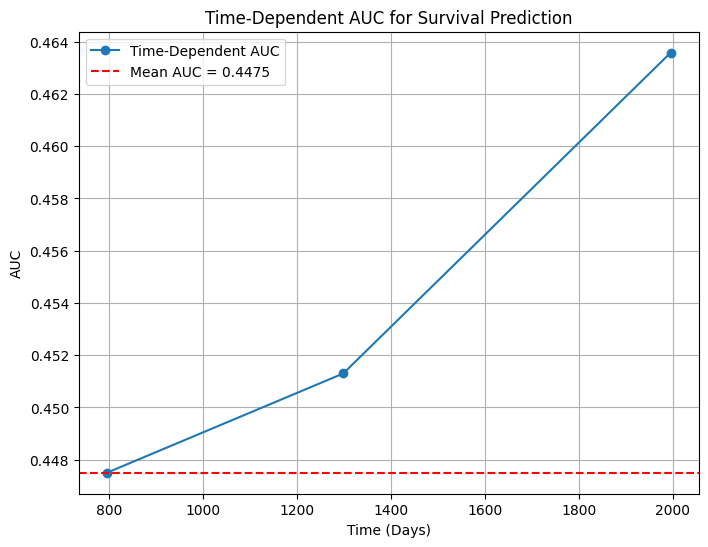

In [ ]:
#survival structures for training and testing
y_train_surv = Surv.from_dataframe('Event', 'SurvivalTime', train_df)
y_test_surv = Surv.from_dataframe('Event', 'SurvivalTime', test_df)

# Prepare feature matrices
feature_cols = [col for col in relevant_columns if col not in ['Event', 'SurvivalTime']]
X_train = train_df[feature_cols]
X_test = test_df[feature_cols]

# Create XGBoost matrices
dtrain = xgb.DMatrix(X_train, label=train_df['Event'])
dtest = xgb.DMatrix(X_test, label=test_df['Event'])

# XGBoost parameters
params = {
    'objective': 'survival:cox',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100,
                  evals=[(dtrain, 'train')],
                  early_stopping_rounds=10,
                  verbose_eval=True)

# Feature importance
importance = model.get_score(importance_type='weight')
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Make predictions
y_pred = model.predict(dtest)

# Calculate time-dependent AUC
time_points = np.percentile(test_df['SurvivalTime'], [25, 50, 75])
auc_values, mean_auc = cumulative_dynamic_auc(y_train_surv, y_test_surv, y_pred, time_points)

# Print AUC results
print("\nTime-dependent AUC values:")
for i, t in enumerate(time_points):
    print(f"Time {int(t)} days: {auc_values[i]:.4f}")
print(f"Mean AUC: {mean_auc:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(time_points, auc_values, marker='o', label="Time-Dependent AUC")
plt.axhline(y=mean_auc, color='r', linestyle='--', label=f"Mean AUC = {mean_auc:.4f}")
plt.xlabel("Time (Days)")
plt.ylabel("AUC")
plt.title("Time-Dependent AUC for Survival Prediction")
plt.legend()
plt.grid(True)
plt.show()
